<a href="https://colab.research.google.com/github/HJNVR/Python-in-Finance/blob/main/02_superintelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Superintelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [11]:
import gym # openAI 
import numpy as np
import pandas as pd
np.random.seed(100)

In [12]:
env = gym.make('CartPole-v0') # initialize the game 平衡车

In [13]:
env.seed(100)

[100]

In [14]:
action_size = env.action_space.n
action_size

2

In [15]:
[env.action_space.sample() for _ in range(10)]
# 1 - right, 0 - left 

[1, 1, 0, 0, 1, 0, 1, 1, 0, 1]

In [16]:
state_size = env.observation_space.shape[0]
state_size # 看下一行，分成4个state

4

In [17]:
# reset the environment and capture the states
state = env.reset()
state  # [cart position, cart velocity, pole angle, pole angular velocity]

array([-0.01628537,  0.02379786, -0.0391981 , -0.01476447])

In [18]:
state, reward, done, _ = env.step(env.action_space.sample())
state, reward, done, _

(array([-0.01580941, -0.17074066, -0.03949338,  0.26529786]), 1.0, False, {})

In [19]:
env.step?

In [10]:
%%time
data = pd.DataFrame()
state = env.reset()
length = []
for run in range(25000):
    done = False
    prev_state = env.reset()
    treward = 1
    results = []
    while not done:
        action = env.action_space.sample() 
        state, reward, done, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state
    if treward >= 110: #如果分数 > 110, 就把数据记录下来， 因为结果不错
        data = data.append(pd.DataFrame(results))
        length.append(treward)

CPU times: user 8.84 s, sys: 160 ms, total: 9 s
Wall time: 8.88 s


In [20]:
np.array(length).mean()

123.75

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 109
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      495 non-null    float64
 1   s2      495 non-null    float64
 2   s3      495 non-null    float64
 3   s4      495 non-null    float64
 4   a       495 non-null    int64  
 5   r       495 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.1 KB


In [22]:
data.tail()

,s1,s2,s3,s4,a,r
105,1.527862,0.938432,-0.128346,-0.387795,1,1.0
106,1.546630,1.135120,-0.136101,-0.718031,1,1.0
107,1.569333,1.331837,-0.150462,-1.050267,1,1.0
108,1.595969,1.528599,-0.171467,-1.386146,1,1.0
109,1.626541,1.725393,-0.199190,-1.727173,1,1.0


In [23]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [24]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [25]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

In [26]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [27]:
from keras.layers import Dense
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(Dense(64, activation='relu',
                input_dim=env.observation_space.shape[0]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [29]:
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


CPU times: user 844 ms, sys: 69.3 ms, total: 913 ms
Wall time: 1.27 s


In [30]:
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,acc,val_loss,val_acc
22,0.654354,0.618687,0.688934,0.565657
23,0.654141,0.623737,0.691589,0.565657
24,0.652822,0.608586,0.688376,0.575758


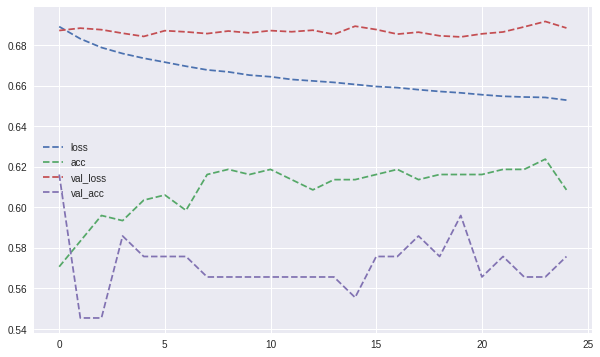

In [31]:
res.plot(figsize=(10, 6), style='--');

In [32]:
def epoch():
    print('|', end='')
    done = False
    state = env.reset()
    treward = 1
    while not done:
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0)
        state, reward, done, _ = env.step(action)
        treward += reward if not done else 0
    return treward

In [33]:
epoch()

|

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


200.0

In [34]:
%%time
res = np.array([epoch() for _ in range(100)])
print()
res

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CPU times: user 18.9 s, sys: 626 ms, total: 19.6 s
Wall time: 18.9 s


In [35]:
res.mean()

162.06

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>